Eugenio Salazar Almanza - A01701996
IA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error

In [ ]:
#carga dataset
data = pd.read_csv("winequalityred.csv") 
data.head()

#Obtener descripción de dataset
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
sns.set()

#Correlación de las variables
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


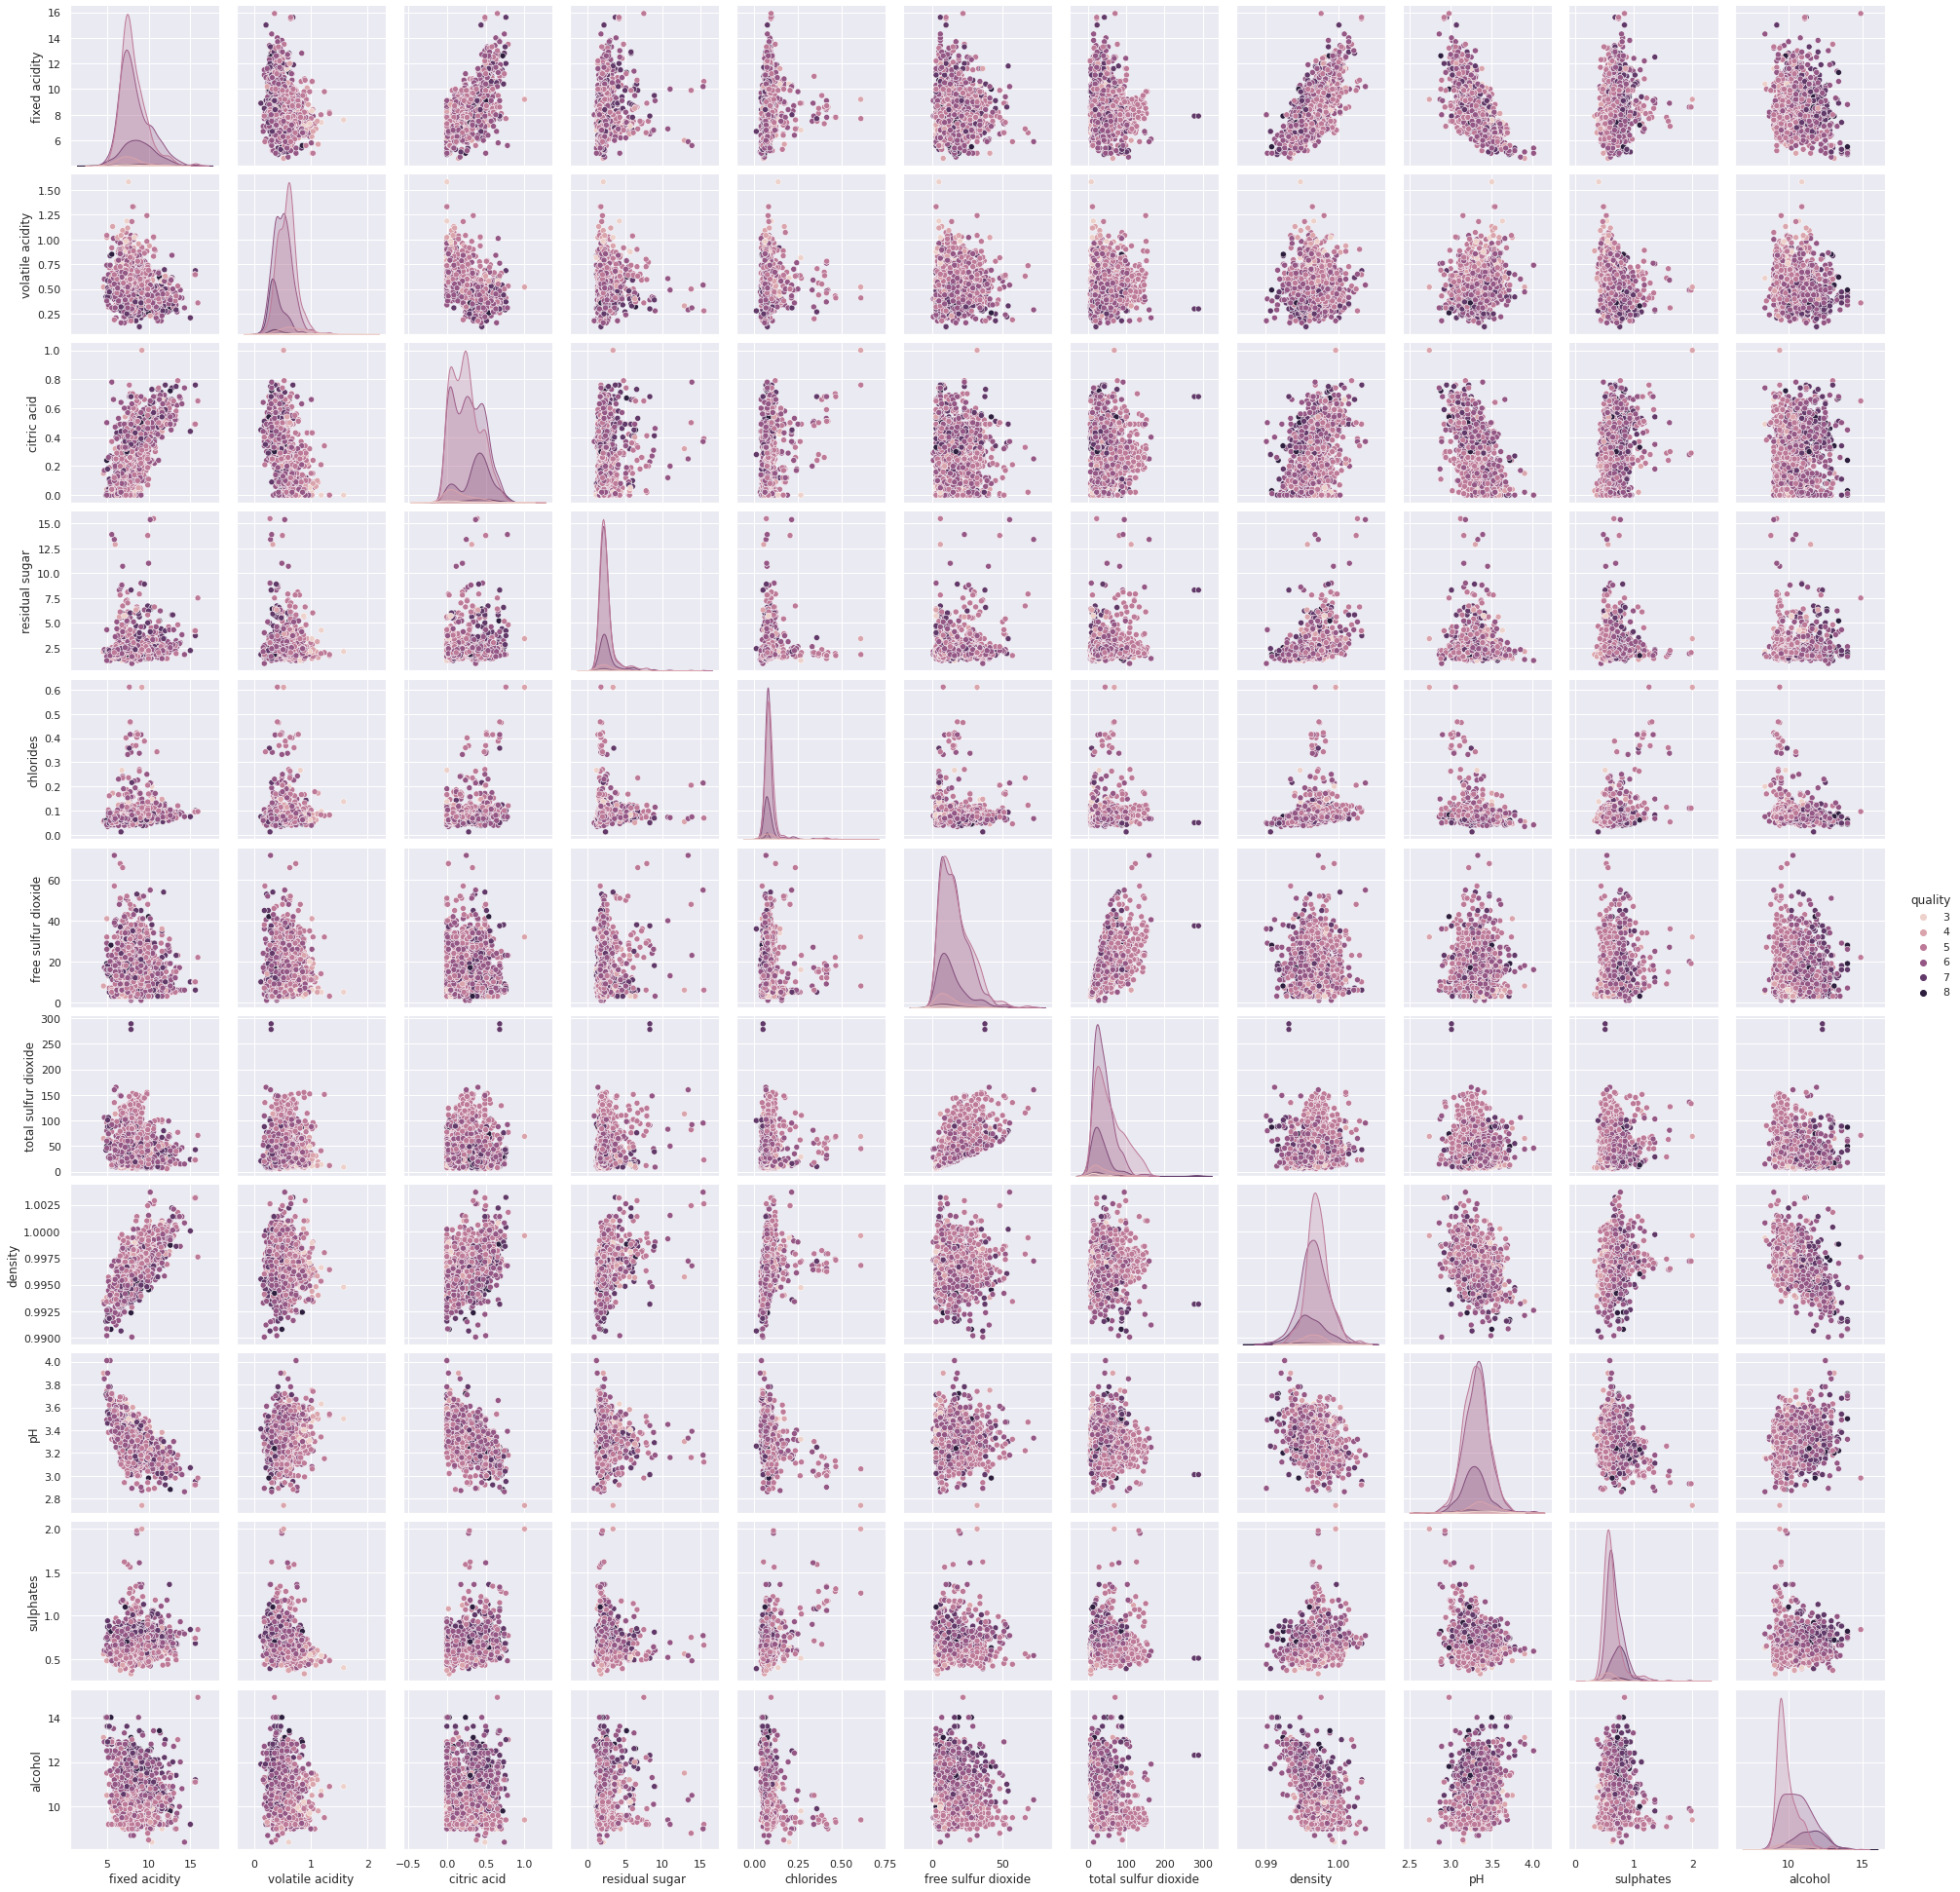

In [ ]:
#Gráfica de correlación de variables
sns.pairplot(data,hue = 'quality')

In [ ]:
#Correlación con base en la quality, que es nuestra variable relevante
corr = data.corr()
corr[['quality']].sort_values(by = 'quality',ascending = False).style.background_gradient()

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


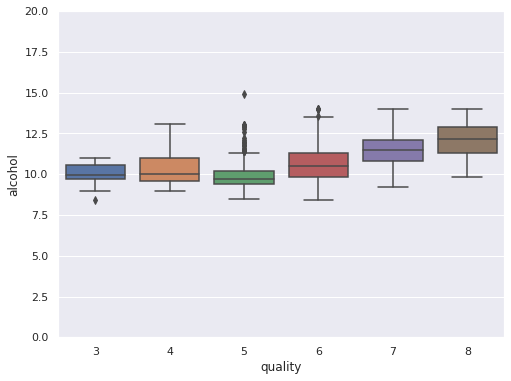

In [ ]:
#Correlación del alcohol con la calidad en un gráfico
var = 'quality'
data = pd.concat([data['alcohol'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="alcohol", data=data)
fig.axis(ymin=0, ymax=20);

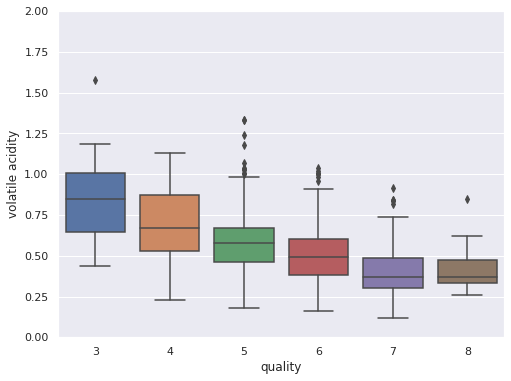

In [ ]:
#Correlación de la acidez volatil con la calidad en un gráfico
data = pd.read_csv("winequalityred.csv") 
var = 'quality'
data = pd.concat([data['volatile acidity'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="volatile acidity", data=data)
fig.axis(ymin=0, ymax=2);

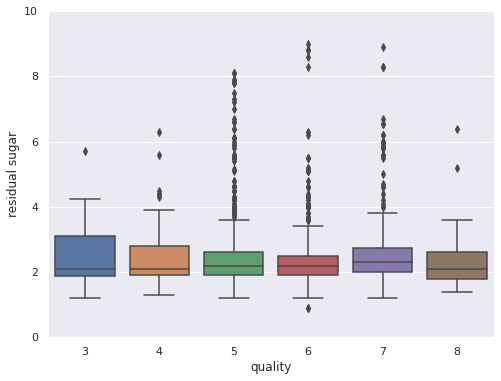

In [ ]:
#Correlación del residuo de azucar con la calidad en un gráfico
data = pd.read_csv("winequalityred.csv") 
var = 'quality'
data = pd.concat([data['residual sugar'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="residual sugar", data=data)
fig.axis(ymin=0, ymax=10);

In [ ]:
#Obtener datos
data = pd.read_csv("winequalityred.csv") 
data['quality'].dtype
data['quality_label'] = (data['quality'] > 6.5)*1

y = data["quality_label"]
x = data[["volatile acidity","citric acid","total sulfur dioxide","density","sulphates","alcohol"]]
X = x.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 42)

  
# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=10, random_state = 0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
### Tomamos las instancias al azar
np.random.seed(42) 
n = 3
idxs = np.random.randint(X.shape[0], size=10)
instancias = X[idxs,:]
print(instancias)

[[2.9000e-01 2.6000e-01 1.1000e+01 9.9150e-01 5.4000e-01 1.3500e+01]
 [2.0000e-01 3.5000e-01 1.5000e+01 9.9458e-01 8.0000e-01 1.1900e+01]
 [6.2000e-01 6.0000e-02 8.5000e+01 9.9746e-01 5.4000e-01 9.5000e+00]
 [6.3500e-01 1.0000e-01 6.0000e+01 9.9638e-01 7.5000e-01 1.0900e+01]
 [6.0000e-01 0.0000e+00 1.0000e+01 9.9770e-01 6.3000e-01 1.0400e+01]
 [4.0000e-01 4.7000e-01 2.0000e+01 9.9772e-01 5.0000e-01 1.0500e+01]
 [3.9000e-01 3.3000e-01 5.3000e+01 9.9294e-01 6.2000e-01 1.2200e+01]
 [5.5000e-01 4.0000e-02 5.6000e+01 9.9620e-01 6.0000e-01 1.0900e+01]
 [5.0000e-01 4.2000e-01 5.1000e+01 9.9820e-01 7.2000e-01 1.1500e+01]
 [7.3000e-01 0.0000e+00 2.4000e+01 9.9798e-01 4.6000e-01 9.6000e+00]]


In [ ]:
#Hacemos la predicción de los datos
y_pred = tree.predict(instancias)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0]


In [ ]:
for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')

Instancia 1126. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 1459. Etiqueta real: 1. Etiqueta predicha: 1
Instancia 860. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 1294. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 1130. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 1095. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 1044. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 121. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 466. Etiqueta real: 0. Etiqueta predicha: 0
Instancia 1238. Etiqueta real: 0. Etiqueta predicha: 0


In [ ]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X_test)

#Obtener exactitud de modelo
accuracy_score(y_pred,y_test)

0.875

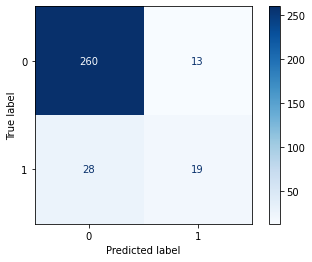

In [ ]:
from sklearn.metrics import plot_confusion_matrix

#Creamos matriz de confusión
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues, values_format = '.0f')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Obtenemos datos
y = data["quality"]
x = data[["volatile acidity","citric acid","total sulfur dioxide","density","sulphates","alcohol"]]
#x = data[["alcohol"]]
X = x.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

#Entrenamos modelo de regresión
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.intercept_)
print(reg.coef_)




0.3497012389574284
-7.510808014745554
[-1.31569299e+00 -9.63737980e-02 -2.04622319e-03  1.03183547e+01
  6.88820125e-01  3.10973694e-01]


In [ ]:
np.random.seed(42) 
n = 3
idxs = np.random.randint(X.shape[0], size=10)
instancias = X[idxs,:]
print(instancias)

[[2.9000e-01 2.6000e-01 1.1000e+01 9.9150e-01 5.4000e-01 1.3500e+01]
 [2.0000e-01 3.5000e-01 1.5000e+01 9.9458e-01 8.0000e-01 1.1900e+01]
 [6.2000e-01 6.0000e-02 8.5000e+01 9.9746e-01 5.4000e-01 9.5000e+00]
 [6.3500e-01 1.0000e-01 6.0000e+01 9.9638e-01 7.5000e-01 1.0900e+01]
 [6.0000e-01 0.0000e+00 1.0000e+01 9.9770e-01 6.3000e-01 1.0400e+01]
 [4.0000e-01 4.7000e-01 2.0000e+01 9.9772e-01 5.0000e-01 1.0500e+01]
 [3.9000e-01 3.3000e-01 5.3000e+01 9.9294e-01 6.2000e-01 1.2200e+01]
 [5.5000e-01 4.0000e-02 5.6000e+01 9.9620e-01 6.0000e-01 1.0900e+01]
 [5.0000e-01 4.2000e-01 5.1000e+01 9.9820e-01 7.2000e-01 1.1500e+01]
 [7.3000e-01 0.0000e+00 2.4000e+01 9.9798e-01 4.6000e-01 9.6000e+00]]


In [ ]:
#Hacemos predicción de la calidad con datos prueba
y_pred = reg.predict(instancias)
print(y_pred)

[6.86083184 6.67570153 5.11211002 5.70854683 5.64201959 5.78115739
 6.30227324 5.72916773 6.05844079 5.07934314]


In [ ]:
for i, idx in enumerate(idxs):
    print(f'Instancia {idx}. Etiqueta real: {y[idx]}. Etiqueta predicha: {y_pred[i]}')

Instancia 1126. Etiqueta real: 6. Etiqueta predicha: 6.860831844230357
Instancia 1459. Etiqueta real: 7. Etiqueta predicha: 6.675701533488499
Instancia 860. Etiqueta real: 5. Etiqueta predicha: 5.112110019334254
Instancia 1294. Etiqueta real: 6. Etiqueta predicha: 5.708546826842393
Instancia 1130. Etiqueta real: 6. Etiqueta predicha: 5.6420195871154375
Instancia 1095. Etiqueta real: 5. Etiqueta predicha: 5.781157388649073
Instancia 1044. Etiqueta real: 6. Etiqueta predicha: 6.302273244005458
Instancia 121. Etiqueta real: 6. Etiqueta predicha: 5.729167729161614
Instancia 466. Etiqueta real: 6. Etiqueta predicha: 6.05844079223793
Instancia 1238. Etiqueta real: 4. Etiqueta predicha: 5.079343136663588


In [ ]:
#Hacemos predicción de la calidad con datos de testing
y_pred = reg.predict(X_test)
print(max_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))



2.3673193208450263
0.39428531203198314
